### **norm.cdf() y norm.ppf()**

#### **`Diferencia entre .cdf() y .ppf()`**

La función **`.cdf()`** calcula la probabilidad para un valor dado de la distribución normal, mientras que la función **`.ppf()`** calcula el valor de la distribución normal para el que una probabilidad dada es el valor requerido. Son inversas entre sí en este sentido particular.

<center><img src="https://i.stack.imgur.com/aZSLH.png"></center>

In [ ]:
from scipy.stats import norm
print(norm.ppf(0.95))
print(norm.cdf(1.6448536269514722))

1.6448536269514722
0.95


#### **`Ejemplos`**

##### **Ejemplo 1**

In [ ]:
# Importar la biblioteca SciPy
import scipy.stats as stats

# Definir la media y la desviación estándar
media = 3
desviacion = 1

# Calcular la probabilidad de que x esté entre 2 y 4
probabilidad = stats.norm.cdf(4, loc=media, scale=desviacion) - stats.norm.cdf(2, loc=media, scale=desviacion)

print("La probabilidad de que x esté entre 2 y 4 es:", probabilidad)

La probabilidad de que x esté entre 2 y 4 es: 0.6826894921370859


##### **Ejemplo 2**

Suponga que tiene un conjunto de datos aleatorios x que siguen una distribución normal de media **`10`** y desviación típica **`2`**. Se pide encontrar la probabilidad de que:

- **`a)`** La variable aleatoria x sea menor o igual a 8.
- **`b)`**  Sea menor o igual a 10.
- **`c)`** Que la variable x esté por debajo de 12.
- **`d)`** La probabilidad que un valor x esté entre 8 y 12.

In [13]:
import numpy as np
# Importar la biblioteca SciPy
import scipy.stats as stats

# Definir la media y la desviación estándar
media = 10
desviacion = 2

# La probabilidad de que la variable x sea menor o igual a 8
a = stats.norm.cdf(8, loc=media, scale=desviacion)

# La probabilidad de que la variable x sea menor o igual a 10
b = stats.norm.cdf(10, loc=media, scale=desviacion)

# La probabilidad de que la variable x sea menor o igual a 10
c = stats.norm.cdf(12, loc=media, scale=desviacion)

# Calcular la probabilidad de que x esté entre 12 y 8
d = stats.norm.cdf(12, loc=media, scale=desviacion) - stats.norm.cdf(8, loc=media, scale=desviacion)

print("La probabilidad de que la variable x sea menor o igual a 8:", np.round(a,3))
print("La probabilidad de que la variable x sea menor o igual a 10:", np.round(b,3))
print("La probabilidad de que la variable x sea menor o igual a 8:", np.round(c,3))
print("La probabilidad de que la variable x sea menor o igual a 8:", np.round(d,3))

La probabilidad de que la variable x sea menor o igual a 8: 0.159
La probabilidad de que la variable x sea menor o igual a 10: 0.5
La probabilidad de que la variable x sea menor o igual a 8: 0.841
La probabilidad de que la variable x sea menor o igual a 8: 0.683


##### **Ejemplo 3**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Supongamos que tenemos 1000 datos que siguen una distribución normal de media 10 y de desviación estándar 2. Estos datos saldrían de haberlos medido en algún proceso, pero para simplificar voy a generarlos con python.

In [ ]:
data = np.random.normal(loc=10, scale=2, size=1000)

Al ejecutarlo me sale que la muestra tiene media 9.957369201658272 y desviación 1.9783697744791475. Pero si lo ejecuto otra vez podrá salir otra cosa. Si la muestra tuviera infinitos elementos, la media sería 10 y la desviación 2.

In [ ]:
print(np.mean(data), np.std(data))

9.957369201658272 1.9783697744791475


In [ ]:
mu, sigma = stats.norm.fit(data)

print(mu)
print(sigma)

9.957369201658272
1.9783697744791475


Puedo pintar el histograma de esta muestra:

(array([  8.,  24.,  70., 169., 194., 231., 169.,  98.,  32.,   5.]),
 array([ 3.81815659,  5.02095882,  6.22376105,  7.42656328,  8.6293655 ,
         9.83216773, 11.03496996, 12.23777218, 13.44057441, 14.64337664,
        15.84617886]),
 <BarContainer object of 10 artists>)

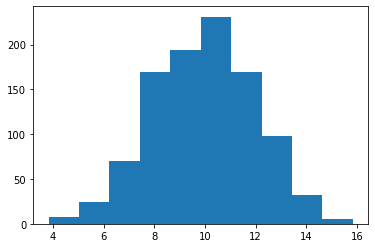

In [ ]:
plt.hist(data)

Ahora puedo usar **`scipy.stat.norm`** para crear una distribución normal continua con los parámetros que extraje de la muestra (observa que no son los "verdaderos" parámetros, pues esos nos son desconocidos en un caso real):

Para que sean comparables, el histograma debe estar normalizado (la suma de todas las barras debe dar 1 y no 1000 como en el caso anterior), lo cual se logra pasando el parámetro normed=True a la función hist.

Por otro lado, para pintar el pdf, ya que esa curva es infinita, debemos elegir un valor mínimo y uno máximo en el eje x. Podemos elegir por ejemplo representar entre el percentil 0.001 y el 0.999 (y tomar 100 puntos para hacer esa gráfica)

In [ ]:
min = stats.norm.ppf(0.001, mu, sigma)
min

3.8437470110168794

In [ ]:
max = stats.norm.ppf(0.999, mu, sigma)
max

16.070991392299664

In [ ]:
x_axis = np.linspace(min, max, num=100)
y_axis = stats.norm.pdf(x_axis, mu, sigma)

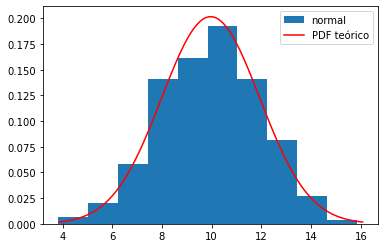

In [ ]:
plt.hist(data, density=True, linewidth=2, label='normal')
plt.plot(x_axis, y_axis, "r-", label="PDF teórico")
plt.legend()